<a href="https://colab.research.google.com/github/Nawshin-25/Saint_Martin/blob/main/PCP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from scipy.interpolate import griddata

In [3]:
shapefile_path = '/content/drive/MyDrive/Data/2021/Total_area_2021.shp'
shape_gdf = gpd.read_file(shapefile_path)

In [4]:
file_path = '/content/drive/MyDrive/Data/Saint Martin Data.xlsx'
df = pd.read_excel(file_path, sheet_name='Physiochemical Parameters')
print(df.head())

  Stations   Latitude  Longitude  mVpH    pH     EC    TDS  Salinity  Density  \
0    St 01  20.636462  92.331646  -2.1  7.08  49.00  24.49     32.02    21.20   
1    St 02  20.636301  92.319973   5.4  6.95  49.55  24.77     32.39    21.40   
2    St 03  20.635659  92.303665   3.5  7.12  49.36  23.94     31.11    20.10   
3    St 04  20.627144  92.330273  -3.8  7.42  46.23  23.12     29.94    28.90   
4    St 05  20.623931  92.299888 -27.9  7.06  47.83  24.56     30.24    22.47   

   Temperature  Pressure  
0        24.62     99.83  
1        24.86     99.84  
2        27.00    100.11  
3        27.00    100.11  
4        27.00    100.10  


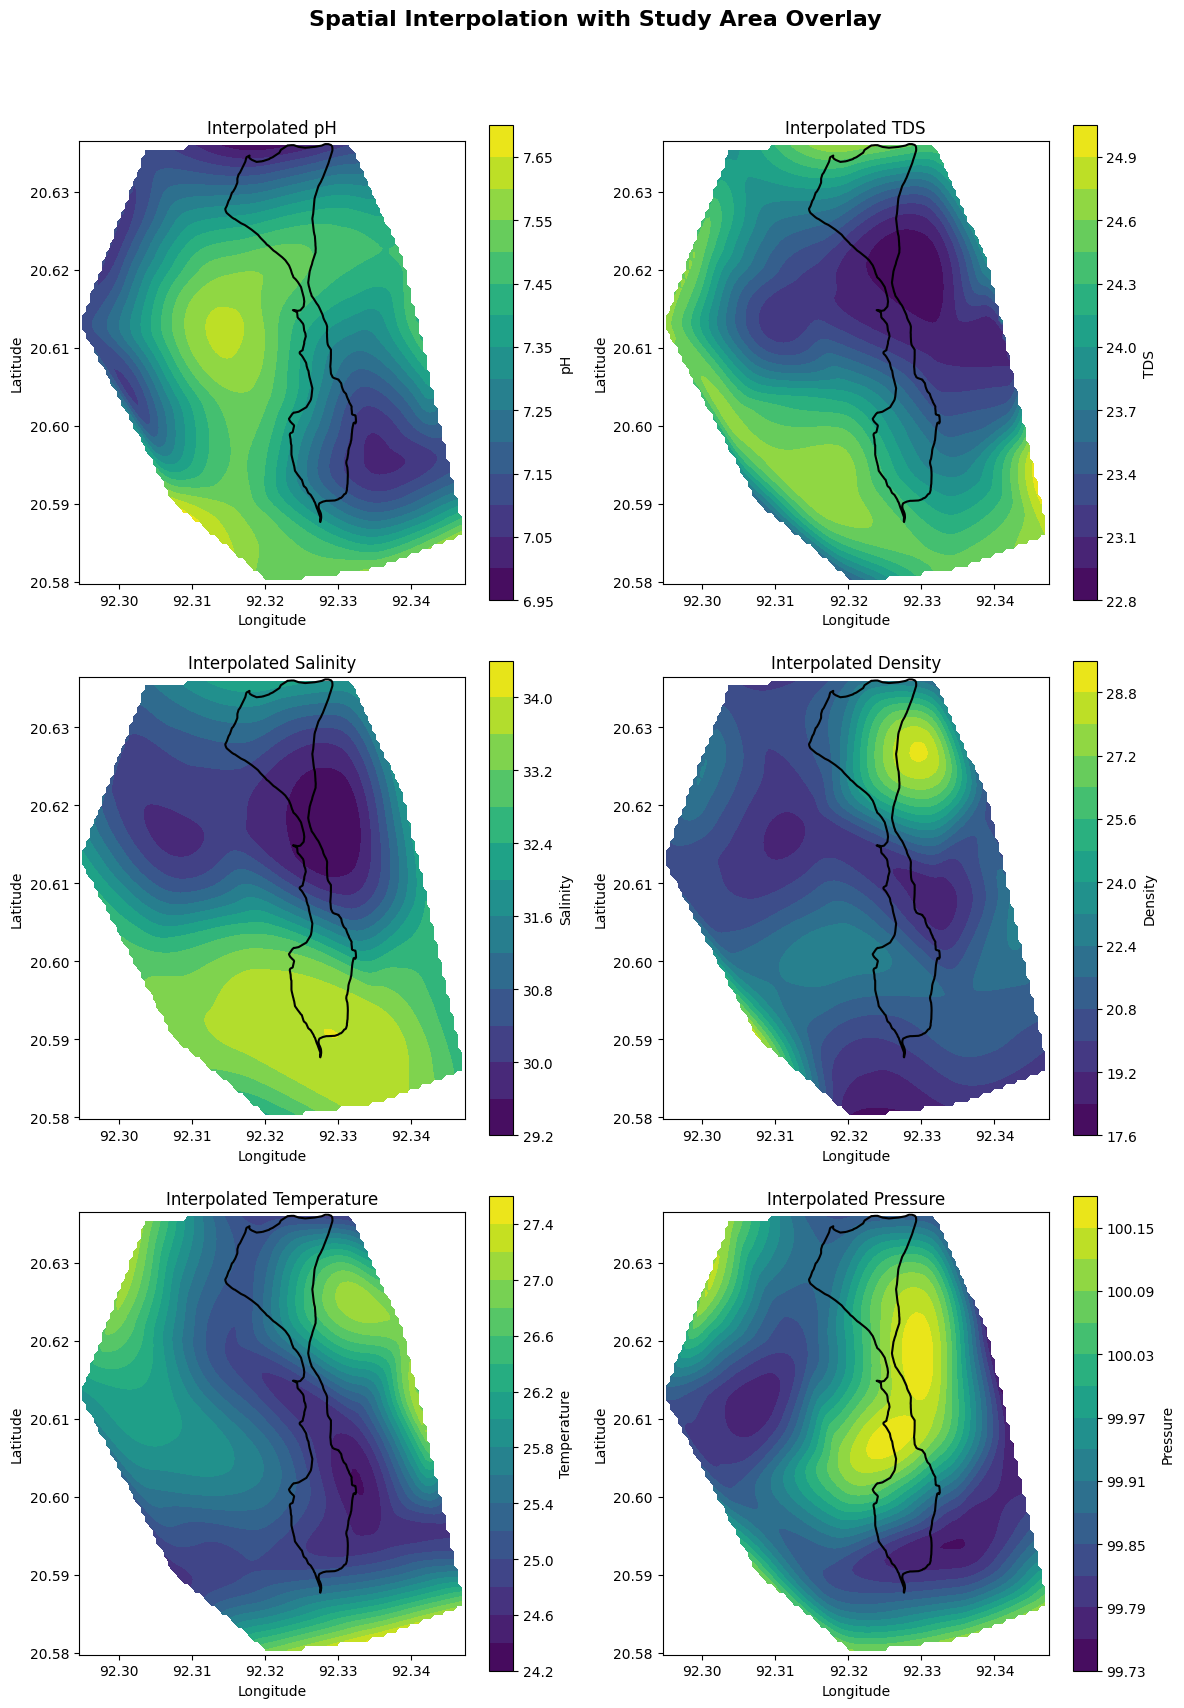

In [17]:
points = df[['Longitude', 'Latitude']]
parameters = ['pH', 'TDS', 'Salinity', 'Density', 'Temperature', 'Pressure']
grid_x, grid_y = np.mgrid[points['Longitude'].min():points['Longitude'].max():100j,
                           points['Latitude'].min():points['Latitude'].max():100j]
fig, axes = plt.subplots(3, 2, figsize=(12, 18))
axes = axes.flatten()

for ax, param in zip(axes, parameters):
    grid_z = griddata(points.values, df[param].values, (grid_x, grid_y), method='cubic')
    c = ax.contourf(grid_x, grid_y, grid_z, levels=15, cmap='viridis')
    shape_gdf.boundary.plot(ax=ax, color='black')
    ax.set_title(f'Interpolated {param}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    plt.colorbar(c, ax=ax, label=param)

for i in range(len(parameters), len(axes)):
    fig.delaxes(axes[i])

fig.suptitle('Spatial Interpolation with Study Area Overlay', fontsize=16, fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()